In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
dataset = pd.read_csv("C_data.csv")

In [3]:
pd.pandas.set_option("display.max_columns",None)

In [4]:
dataset.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.004660,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [5]:
dataset.shape

(569, 33)

In [6]:
NA_Values = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

for feature in NA_Values:
    print(feature, dataset[feature].isnull().mean().round(decimals =0), "% Missing Value")

Unnamed: 32 1.0 % Missing Value


In [7]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
dataset = dataset.drop(["Unnamed: 32"],axis =1)

In [9]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
dataset = pd.get_dummies(dataset,columns= ["diagnosis"], drop_first = True)

In [13]:
dataset = dataset.drop(["id"],axis= 1)

In [14]:
dataset.head(20)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


In [15]:
dataset.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


<AxesSubplot:>

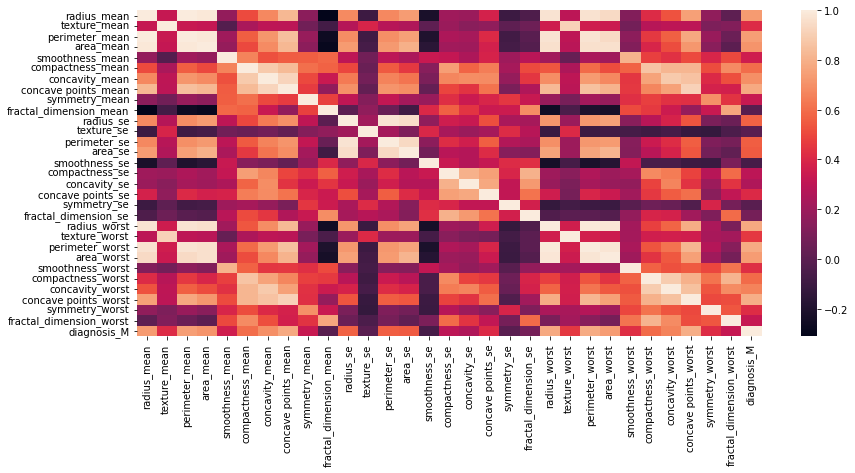

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(dataset.corr())

In [17]:
Correlation = (dataset.corr()["diagnosis_M"]).sort_values(ascending = False)
Correlation 

diagnosis_M                1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [18]:
dataset = dataset.loc[:,["concave points_worst","perimeter_worst","concave points_mean","radius_worst","perimeter_mean","area_worst","radius_mean","area_mean","concavity_mean","concavity_worst","diagnosis_M"]]

In [19]:
dataset.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,diagnosis_M
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,1
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,1
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,1
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,1
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,1


In [20]:
dataset.corr()["diagnosis_M"].sort_values(ascending = False)

diagnosis_M             1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis_M, dtype: float64

<AxesSubplot:>

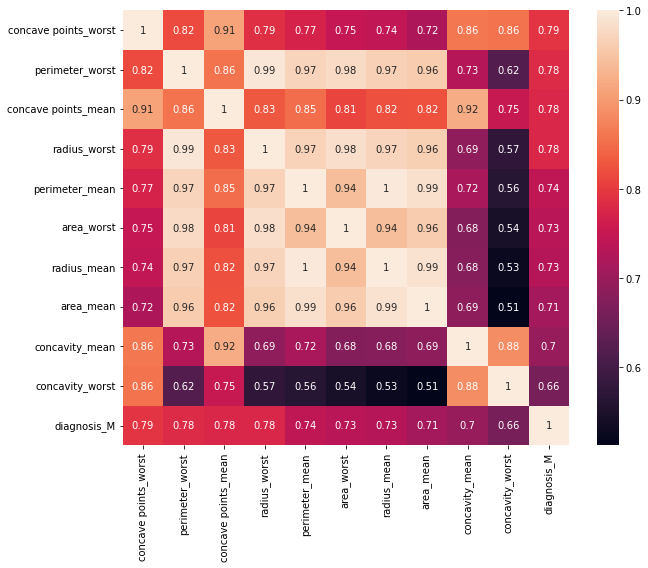

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(),annot = True)

In [22]:
dataset = dataset.drop(["radius_worst"],axis =1)

<AxesSubplot:>

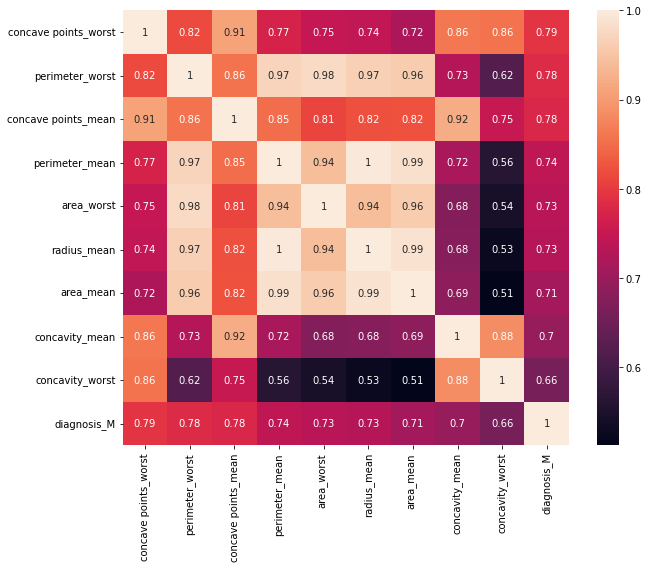

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(),annot = True)

In [24]:
dataset = dataset.drop(["concave points_mean"],axis =1)

<AxesSubplot:>

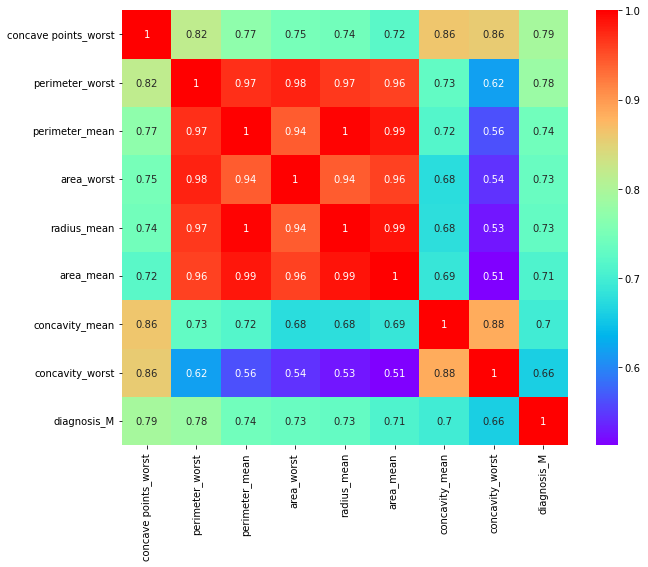

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(),annot = True, cmap= "rainbow")

In [26]:
dataset = dataset.drop(["radius_mean"],axis =1)

<AxesSubplot:>

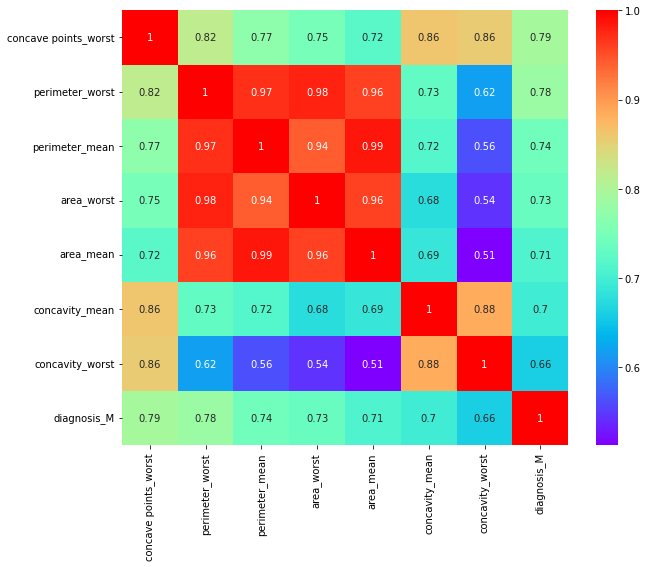

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(),annot = True, cmap= "rainbow")

In [100]:
dataset.drop(["area_mean"],axis=1)

,concave points_worst,perimeter_worst,perimeter_mean,area_worst,concavity_mean,concavity_worst,diagnosis_M
0,0.2654,184.60,122.80,2019.0,0.30010,0.7119,1
1,0.1860,158.80,132.90,1956.0,0.08690,0.2416,1
2,0.2430,152.50,130.00,1709.0,0.19740,0.4504,1
3,0.2575,98.87,77.58,567.7,0.24140,0.6869,1
4,0.1625,152.20,135.10,1575.0,0.19800,0.4000,1
...,...,...,...,...,...,...,...
564,0.2216,166.10,142.00,2027.0,0.24390,0.4107,1
565,0.1628,155.00,131.20,1731.0,0.14400,0.3215,1
566,0.1418,126.70,108.30,1124.0,0.09251,0.3403,1
567,0.2650,184.60,140.10,1821.0,0.35140,0.9387,1


In [101]:
x = dataset.drop(["diagnosis_M"],axis =1)

In [102]:
y = dataset["diagnosis_M"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.75, random_state = 101)

In [31]:
dataset["diagnosis_M"].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [33]:
#predict the model

In [34]:
y_pred_train= logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [35]:
#Evaluate the Model

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# print (confusion_matrix(y_train,y_pred_train))
#############
print(confusion_matrix(y_test,y_pred_test))

In [37]:
print(classification_report(y_train,y_pred_train))
###########
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       269
           1       0.94      0.91      0.93       157

    accuracy                           0.95       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [38]:
############

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier()
D_tree.fit(x_train,y_train)


DecisionTreeClassifier()

In [40]:
y_pred_train = D_tree.predict(x_train)
y_pred_test = D_tree.predict(x_test)

In [41]:
print(confusion_matrix(y_train, y_pred_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test))

[[269   0]
 [  0 157]]
#################################################################
[[82  6]
 [ 3 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       157

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        88
           1       0.90      0.95      0.92        55

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9370629370629371


# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_reg.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [79]:
y_pred_train_rf = rf_reg.predict(x_train)
y_pred_test_rf = rf_reg.predict(x_test)

In [80]:
print(accuracy_score(y_train, y_pred_train_rf))
print("###############"*10)
print(accuracy_score(y_test, y_pred_test_rf))

1.0
######################################################################################################################################################
0.9790209790209791


In [45]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf_reg, x_test, y_test, cv=10)
accuracy

array([0.93333333, 0.93333333, 1.        , 1.        , 0.92857143,
       1.        , 0.92857143, 1.        , 0.92857143, 0.85714286])

In [46]:
print(confusion_matrix(y_train, y_pred_train_rf))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_test_rf))

print(classification_report(y_train, y_pred_train_rf))
print(classification_report(y_test, y_pred_test_rf))

print("Training Accuracy :", accuracy_score(y_train, y_pred_train_rf))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test_rf))

[[269   0]
 [  0 157]]
#################################################################
[[87  1]
 [ 2 53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       157

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9790209790209791


In [47]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [49]:
print(confusion_matrix(y_train, y_pred_xgb_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_xgb_test))

print(classification_report(y_train, y_pred_xgb_train))
print("#############"*5)
print(classification_report(y_test, y_pred_xgb_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_xgb_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_xgb_test))

[[269   0]
 [  0 157]]
#################################################################
[[86  2]
 [ 2 53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       157

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

#################################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.972027972027972


# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred_train = KNN.predict(x_train)
y_pred_test = KNN.predict(x_test)

In [52]:
# Evaluate the model performance 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
print(classification_report(y_train,y_pred_train))
##################\
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       269
           1       0.94      0.89      0.91       157

    accuracy                           0.94       426
   macro avg       0.94      0.93      0.93       426
weighted avg       0.94      0.94      0.94       426

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [54]:
print(confusion_matrix(y_train, y_pred_train))
print("###########"*10)
print(confusion_matrix(y_test, y_pred_test))

[[260   9]
 [ 18 139]]
##############################################################################################################
[[84  4]
 [ 4 51]]


In [55]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("###########"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy : 0.9366197183098591
##############################################################################################################
Test Accuracy : 0.9440559440559441


In [56]:
##########Choose the Best K-Value############

In [57]:
error_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    

In [58]:
error_rate 

[0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.06293706293706294,
 0.055944055944055944,
 0.055944055944055944,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.04895104895104895,
 0.055944055944055944,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.055944055944055944,
 0.06293706293706294]

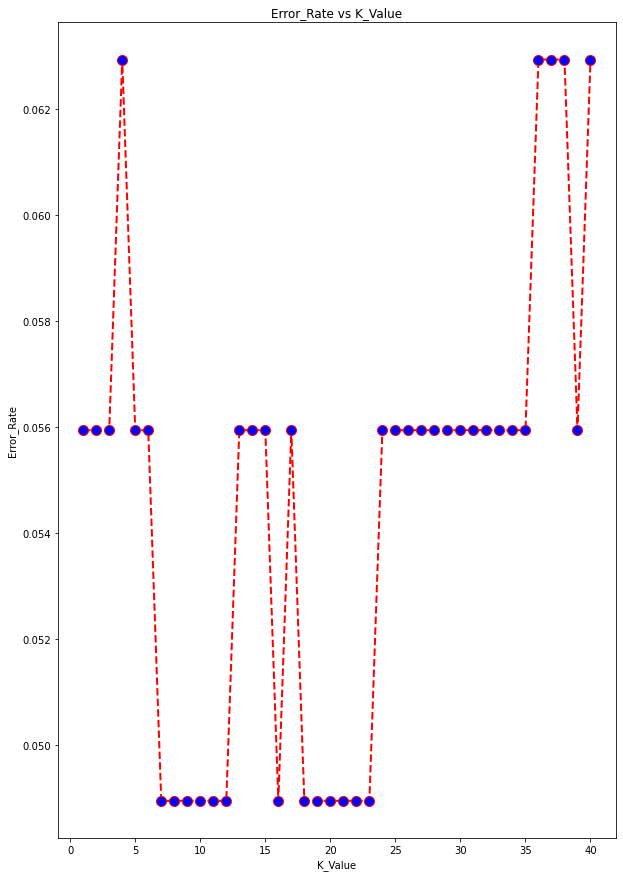

In [59]:
plt.figure(figsize = (10,15))
plt.plot(range(1,41),error_rate, color = 'red',linewidth =2, linestyle = 'dashed', marker = "o", markerfacecolor = 'blue', markersize = 10)
plt.title("Error_Rate vs K_Value")
plt.xlabel("K_Value")
plt.ylabel("Error_Rate")
plt.show()

In [60]:
k = 7

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
# n_neighbors= only odd number
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [63]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("###########"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy : 0.9366197183098591
##############################################################################################################
Test Accuracy : 0.951048951048951


In [64]:
##########Voting Classifier###########

In [81]:
estimator = []
estimator.append(("LR", LogisticRegression()))
estimator.append(("DT",DecisionTreeClassifier()))
estimator.append(("RF",RandomForestClassifier()))
estimator.append(("XGB",XGBClassifier()))
estimator.append(("KNN",KNeighborsClassifier(n_neighbors=7)))



In [82]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators = estimator, voting = 'hard')
VC.fit(x_train,y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('KNN', KNeighborsClassifier(n_neighbors=7))])

In [83]:
y_pred_VC_train = VC.predict(x_train)
y_pred_VC_test = VC.predict(x_test)

In [84]:
print(classification_report(y_train,y_pred_VC_train))
##################\
print(classification_report(y_test,y_pred_VC_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       157

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        88
           1       0.95      0.96      0.95        55

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [85]:
print(confusion_matrix(y_train, y_pred_VC_train))
print("###########"*10)
print(confusion_matrix(y_test, y_pred_VC_test))

[[269   0]
 [  0 157]]
##############################################################################################################
[[85  3]
 [ 2 53]]


In [86]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_VC_train))
print("###########"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_VC_test))

Train Accuracy : 1.0
##############################################################################################################
Test Accuracy : 0.965034965034965


# Randomised Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
estimator = RandomForestClassifier(n_jobs = -1)
params = {'max_depth':[3,5,10,None],
          'max_features':[None,'sqrt'],
         'n_estimators':[100,200,300,400,500],
         'criterion':["gini","entropy"],
         "bootstrap":[True,False],
         "min_samples_leaf":randint(1,4),}

In [ ]:
def hyperparameter(estimator,p_dist,nitr,x,y):
    rdmsearch = RandomizedSearchCV(estimator=estimator,param_distributions=p_dist,n_jobs=-1,n_iter=nitr,cv=10)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return  ht_params,ht_score

In [ ]:
rf_params,rf_score = hyperparameter(estimator,params,40,x,y)

In [ ]:
rf_params,rf_score 

In [90]:
RF2 = RandomForestClassifier(n_estimators=500, criterion='entropy',bootstrap=True,max_depth=None,min_samples_leaf=1)
RF2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [93]:
y_pred_train_RF2 = RF2.predict(x_train)
y_pred_test_RF2= RF2.predict(x_test)

In [94]:
print(accuracy_score(y_train,y_pred_train_RF2))
print("###############"*10)
print(accuracy_score(y_test, y_pred_test_RF2))

1.0
######################################################################################################################################################
0.986013986013986


In [95]:
print(confusion_matrix(y_train, y_pred_train_RF2))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_test_RF2))

print(classification_report(y_train,y_pred_train_RF2))
print(classification_report(y_test, y_pred_test_RF2))

print("Training Accuracy :", accuracy_score(y_train, y_pred_train_RF2))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_test_RF2))

[[269   0]
 [  0 157]]
#################################################################
[[87  1]
 [ 1 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       157

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.986013986013986


In [169]:
### Result

In [96]:
#RF Gave the best result: 
#Entropy gave better result than Gini
#Max Depth No is better
# Min _Leaf =1 is giving best result

In [97]:
###############################################################################with All features##############

In [185]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [235]:
dataset.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [231]:
dataset.shape

(569, 31)

In [189]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [236]:
x = dataset.drop(["diagnosis_M"],axis =1)

In [225]:
x.shape

(569, 7)

In [237]:
y = dataset["diagnosis_M"]

In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = .75, random_state = 101)

In [239]:
RF3 = RandomForestClassifier(n_estimators=500, criterion='entropy',bootstrap=True,max_depth=None,min_samples_leaf=1,max_features=None)
RF3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=500)

In [240]:
y_pred_train_RF3 = RF3.predict(x_train)
y_pred_test_RF3= RF3.predict(x_test)

In [242]:
print(accuracy_score(y_train,y_pred_train_RF3))
print("###############"*10)
print(accuracy_score(y_test, y_pred_test_RF3))

1.0
######################################################################################################################################################
0.965034965034965


In [243]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [244]:
y_pred_train = KNN.predict(x_train)
y_pred_test = KNN.predict(x_test)

In [245]:
print(classification_report(y_train,y_pred_train))
##################\
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       269
           1       0.95      0.89      0.91       157

    accuracy                           0.94       426
   macro avg       0.94      0.93      0.93       426
weighted avg       0.94      0.94      0.94       426

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [246]:
error_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

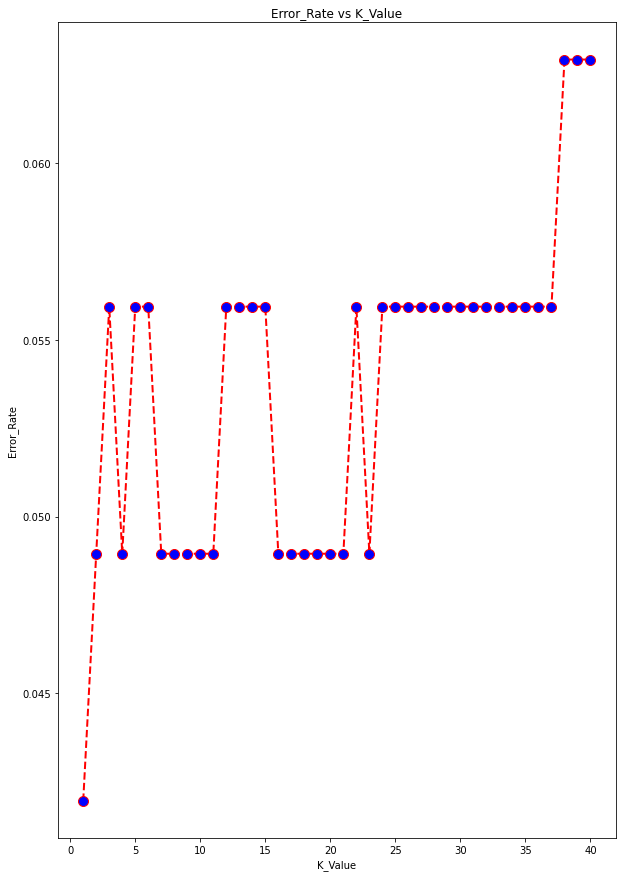

In [247]:
plt.figure(figsize = (10,15))
plt.plot(range(1,41),error_rate, color = 'red',linewidth =2, linestyle = 'dashed', marker = "o", markerfacecolor = 'blue', markersize = 10)
plt.title("Error_Rate vs K_Value")
plt.xlabel("K_Value")
plt.ylabel("Error_Rate")
plt.show()

In [248]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [249]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [250]:
y_pred_train = KNN.predict(x_train)
y_pred_test = KNN.predict(x_test)

In [251]:
print("Train Accuracy :",accuracy_score(y_train, y_pred_train))
print("###########"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Train Accuracy : 1.0
##############################################################################################################
Test Accuracy : 0.958041958041958


In [216]:
############# With all features scores drooped by 2% and accuracy is 96.5%, little higher################3

In [217]:
############## Trying with Most Significant Features ignoring Multicollinearity#########

In [222]:
x.shape

(569, 10)

In [257]:
dataset.shape

(569, 11)

In [258]:
x = dataset.drop(["diagnosis_M"],axis =1)

In [259]:
y = dataset["diagnosis_M"]

In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = .75, random_state = 101)

In [282]:
RF4 = RandomForestClassifier(n_estimators=500, criterion='entropy',bootstrap=True,max_depth=None,min_samples_leaf=1,max_features='sqrt')
RF4.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [283]:
y_pred_train_RF4 = RF4.predict(x_train)
y_pred_test_RF4= RF4.predict(x_test)

In [284]:
print(accuracy_score(y_train,y_pred_train_RF4))
print("###############"*10)
print(accuracy_score(y_test, y_pred_test_RF4))

1.0
######################################################################################################################################################
0.972027972027972


In [285]:
##### Again the score is lesser with significant featres##########

In [117]:
############Final Findings###############
#1. Random Forest Gave the best result, follwed by XGBoost and then K-Neighbour
#2. Feature Selection helped to take the accuracy upto 98.6% which is very near to 99%
#3. Entropy continues to be the better criterion the gini

In [1]:
https://www.kaggle.com/code/farhanmayyeri/breast-cancer-diagnosis-eda-model-deploy-98

SyntaxError: invalid syntax (Temp/ipykernel_14236/2775797635.py, line 1)